In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')
label_classes = np.load('label_encoder_classes.npy', allow_pickle=True)

In [10]:
num_classes = len(label_classes)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
def build_model(input_shape=(42,), num_classes=len(label_classes)):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',  # Changed to match one-hot labels
        metrics=[
            metrics.CategoricalAccuracy(name='accuracy'),  # Changed from Sparse
            metrics.Recall(name='recall'),
            metrics.F1Score(name='f1_score')
        ]
    )
    return model

In [13]:
model = build_model()
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_val, y_val_one_hot), batch_size=32)

Epoch 1/20
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6681 - f1_score: 0.6425 - loss: 1.1766 - recall: 0.5169 - val_accuracy: 0.9750 - val_f1_score: 0.9366 - val_loss: 0.1325 - val_recall: 0.9736
Epoch 2/20
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9535 - f1_score: 0.9158 - loss: 0.1922 - recall: 0.9451 - val_accuracy: 0.9799 - val_f1_score: 0.9421 - val_loss: 0.0947 - val_recall: 0.9783
Epoch 3/20
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9655 - f1_score: 0.9276 - loss: 0.1454 - recall: 0.9607 - val_accuracy: 0.9823 - val_f1_score: 0.9451 - val_loss: 0.0803 - val_recall: 0.9805
Epoch 4/20
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9698 - f1_score: 0.9320 - loss: 0.1249 - recall: 0.9659 - val_accuracy: 0.9824 - val_f1_score: 0.9454 - val_loss: 0.0697 - val_recall: 0.9807
Epoch 5/20
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - f1_score: 0.9365 - loss: 0.1027 - recall: 0.9704 - val_accuracy: 0.9841 - val_f1_scor

AttributeError: 'list' object has no attribute 'mean'

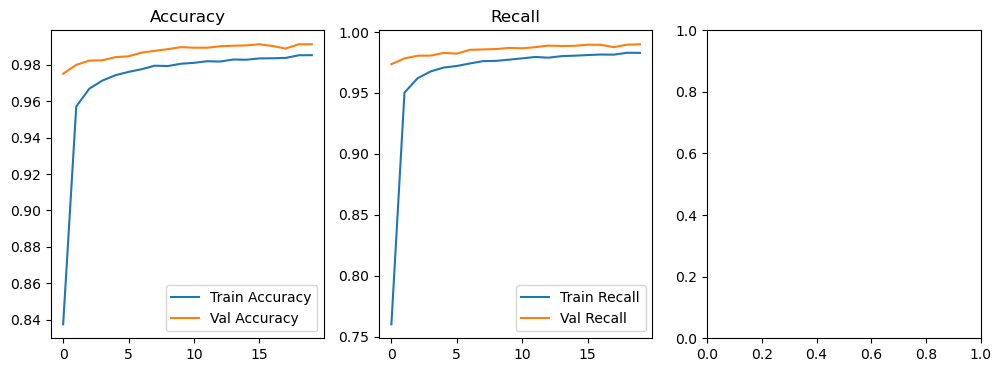

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.title('Recall')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(history.history['f1_score'].mean(axis=1), label='Train F1')
plt.plot(history.history['val_f1_score'].mean(axis=1), label='Val F1')
plt.title('F1 Score')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
test_metrics = model.evaluate(X_test, y_test_one_hot, return_dict=True)
print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")
print(f"Test Recall: {test_metrics['recall']:.4f}")
print(f"Test F1 Score: {tf.reduce_mean(test_metrics['f1_score']).numpy():.4f}")

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - f1_score: 0.9541 - loss: 0.0356 - recall: 0.9910 
Test Accuracy: 0.9901
Test Recall: 0.9893
Test F1 Score: 0.9547


In [20]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)  # Convert back for sklearn
print("\nClassification Report:")
# Specify labels to match all possible classes (0 to 28)
labels = np.arange(len(label_classes))
print(classification_report(y_test_classes, y_pred_classes, labels=labels, target_names=label_classes))

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       208
           B       1.00      1.00      1.00       228
           C       0.99      0.99      0.99       187
           D       1.00      0.99      1.00       255
           E       0.99      1.00      0.99       233
           F       1.00      0.99      1.00       311
           G       1.00      0.99      0.99       250
           H       0.98      1.00      0.99       225
           I       0.98      1.00      0.99       242
           J       1.00      0.99      0.99       267
           K       1.00      0.99      0.99       276
           L       1.00      1.00      1.00       254
           M       0.92      0.99      0.95       155
           N       1.00      0.93      0.96       137
           O       0.98      1.00      0.99       206
           P       1.00      0.97      0.99       234
           Q   

C:\Users\Vedant Kulkarni\anaconda3\envs\mediapipe_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vedant Kulkarni\anaconda3\envs\mediapipe_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vedant Kulkarni\anaconda3\envs\mediapipe_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [21]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[207   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 227   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0 186   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0   0   0]
 [  0   0   0 253   0   0   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 232   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 308   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0 247   3   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 242   0   0

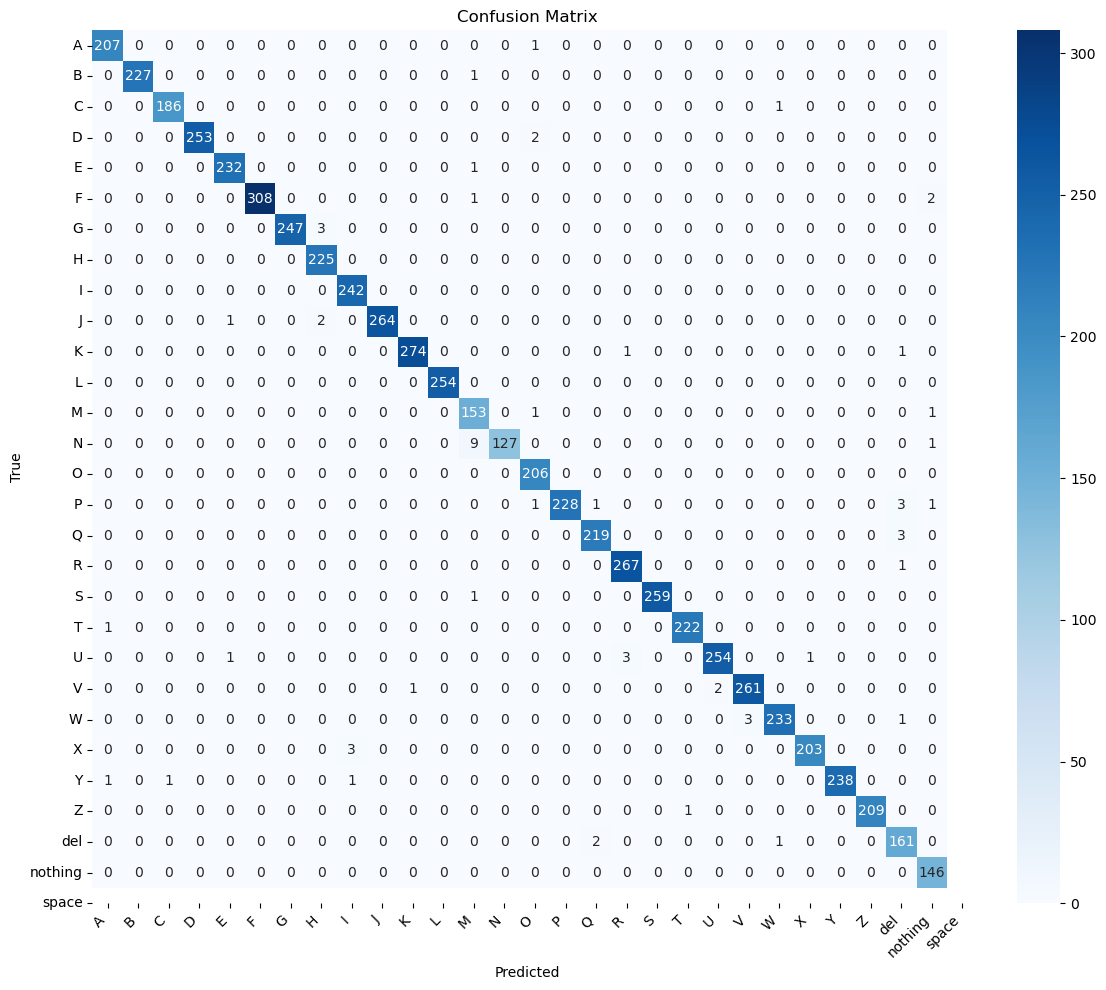

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_classes, yticklabels=label_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
model.save('hand_sign_model.h5')
print("Model saved as 'hand_sign_model.h5'")

Model saved as 'hand_sign_model.h5'
